In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
numerical_df = df.select_dtypes(include=[np.number])
corr=numerical_df.corr()

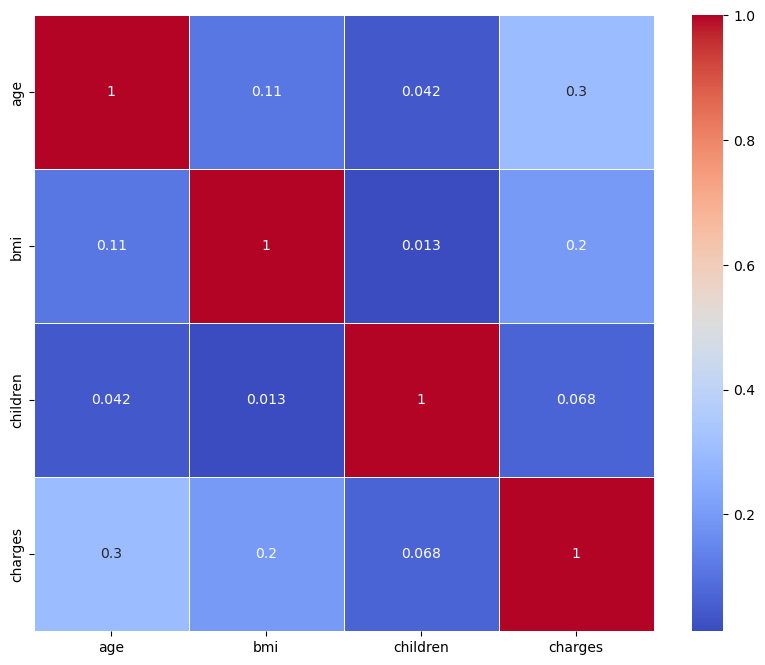

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="coolwarm",linewidths=.5)
plt.show()

In [6]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [7]:
categorical_cols=X.select_dtypes(include=[object]).columns.tolist()
numerical_cols=X.select_dtypes(include=[np.number]).columns.tolist()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
preprocesser=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical_cols),
        ("cat",OneHotEncoder(handle_unknown="ignore"),categorical_cols)
    ]
)
X_train_transformed=preprocesser.fit_transform(X_train)
X_test_transformed=preprocesser.transform(X_test)

In [16]:
linear=LinearRegression()
linear.fit(X_train_transformed,y_train)
y_pred_linear=linear.predict(X_test_transformed)

In [18]:
print("Mean Absolute Eror:",mean_absolute_error(y_test,y_pred_linear))
print("Mean Squared Eror:",mean_squared_error(y_test,y_pred_linear))
print("R2 Score:",r2_score(y_test,y_pred_linear))

Mean Absolute Eror: 4181.194473753654
Mean Squared Eror: 33596915.85136149
R2 Score: 0.7835929767120722


In [21]:
knn=KNeighborsRegressor(n_neighbors=5)

In [23]:
knn.fit(X_train_transformed,y_train)
y_predknn=knn.predict(X_test_transformed)
print("MSE:", mean_squared_error(y_test, y_predknn))
print("MAE:", mean_absolute_error(y_test, y_predknn))
print("R2:", r2_score(y_test, y_predknn))

MSE: 35984256.904628225
MAE: 3631.59117925
R2: 0.7682154529775659


In [50]:
param_grid_knn={
    "n_neighbors":[2,4,6,8,10],
    "weights":["uniform","distance"],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
    "p":[2,4,6]

}

In [51]:
grid_search_knn=GridSearchCV(knn,param_grid_knn,cv=5,scoring="r2",n_jobs=-1,verbose=1)
grid_search_knn.fit(X_train_transformed,y_train)
y_pred_newknn=grid_search_knn.predict(X_test_transformed)
print("MSE:", mean_squared_error(y_test,y_pred_newknn))
print("MAE:", mean_absolute_error(y_test,y_pred_newknn))
print("R2:", r2_score(y_test,y_pred_newknn))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
MSE: 35108307.90176812
MAE: 3466.8580400212195
R2: 0.7738576826720901


In [57]:
grid_search_knn.best_params_

{'algorithm': 'brute', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

In [25]:
svr=SVR()
svr.fit(X_train_transformed,y_train)
y_predsvr=svr.predict(X_test_transformed)
print("MSE:", mean_squared_error(y_test,y_predsvr))
print("MAE:", mean_absolute_error(y_test,y_predsvr))
print("R2:", r2_score(y_test,y_predsvr))

MSE: 166204282.6983881
MAE: 8605.845654288496
R2: -0.0705677341215194


In [47]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']}

In [49]:
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_svr.fit(X_train_transformed,y_train)
y_pred_newsvr=grid_search_svr.predict(X_test_transformed)
print("MSE:", mean_squared_error(y_test,y_pred_newsvr))
print("MAE:", mean_absolute_error(y_test,y_pred_newsvr))
print("R2:", r2_score(y_test,y_pred_newsvr))

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
MSE: 23345421.65006772
MAE: 1803.735880629209
R2: 0.8496256850169189


In [56]:
grid_search_svr.best_params_

{'C': 10000, 'epsilon': 5, 'gamma': 'scale', 'kernel': 'rbf'}

In [45]:
dtr=DecisionTreeRegressor(criterion="poisson",max_depth=4,random_state=0)
dtr.fit(X_train_transformed,y_train)
y_preddtr=dtr.predict(X_test_transformed)
print("MSE:", mean_squared_error(y_test,y_preddtr))
print("MAE:", mean_absolute_error(y_test,y_preddtr))
print("R2:", r2_score(y_test,y_preddtr))

MSE: 21093484.00459744
MAE: 2697.76543053848
R2: 0.8641310379678357


In [52]:
param_grid_dtr={
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":[5,15,20,25,30],
    "min_samples_leaf":[1,2,3,4,10],
    "min_samples_split":[3,5,6,8,12]
}

In [54]:
grid_search_dtr=GridSearchCV(dtr,param_grid_dtr,cv=5,scoring="r2",n_jobs=-1,verbose=1)
grid_search_dtr.fit(X_train_transformed,y_train)
y_prednewdtr=dtr.predict(X_test_transformed)
print("MSE:", mean_squared_error(y_test,y_prednewdtr))
print("MAE:", mean_absolute_error(y_test,y_prednewdtr))
print("R2:", r2_score(y_test,y_prednewdtr))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
MSE: 21093484.00459744
MAE: 2697.76543053848
R2: 0.8641310379678357


In [55]:
grid_search_dtr.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [59]:
default_model_results = {
     'Linear Regression': {'R2':0.7835929767120722 , 'MAE': 4181.194473753654, 'MSE':33596915.85136149 },
     'KNN Regressor': {'R2': 0.7682154529775659, 'MAE': 3631.59117925, 'MSE':35984256.904628225 },
     'SVR Regressor': {'R2':-0.0705677341215194 , 'MAE': 8605.845654288496, 'MSE':166204282.6983881 },
     'Decision Tree Regressor': {'R2':0.8641310379678357 , 'MAE':2697.76543053848 , 'MSE':21093484.00459744 }
 }

In [60]:
optimized_model_results = {
     'KNN Regressor': {'R2':0.7738576826720901 , 'MAE':3466.8580400212195 , 'MSE':35108307.90176812 },
     'SVR Regressor': {'R2': 0.8496256850169189, 'MAE':1803.735880629209 , 'MSE': 23345421.65006772},
     'Decision Tree Regressor': {'R2':0.8641310379678357, 'MAE': 2697.76543053848, 'MSE':21093484.004597}
 }

In [62]:
df_default_results = pd.DataFrame(default_model_results).T
df_optimized_results = pd.DataFrame(optimized_model_results).T

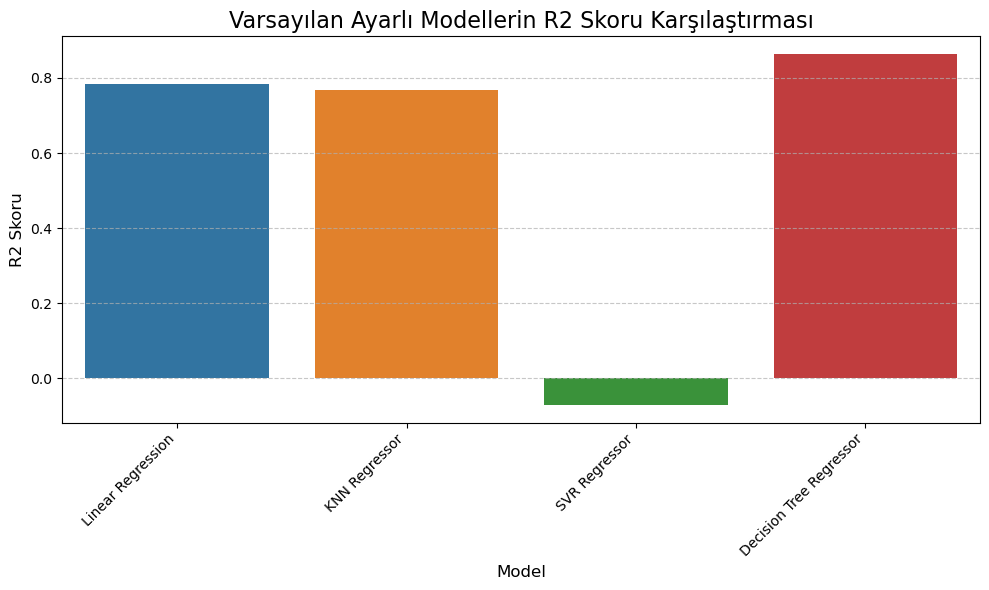

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_default_results.index, y=df_default_results['R2'], palette='tab10')
plt.title('Varsayılan Ayarlı Modellerin R2 Skoru Karşılaştırması', fontsize=16)
plt.ylabel('R2 Skoru', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

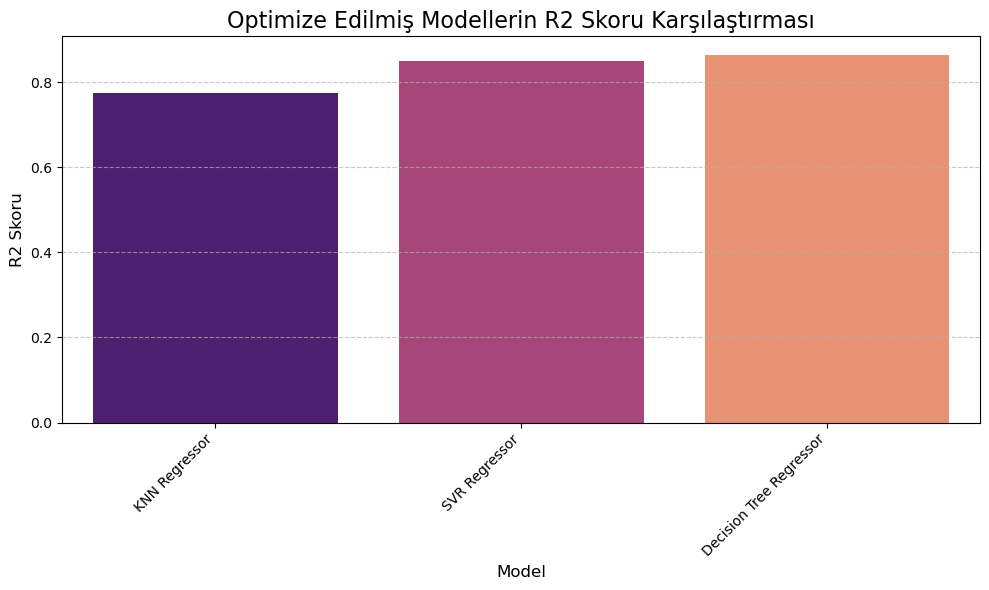

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_optimized_results.index, y=df_optimized_results['R2'], palette='magma')
plt.title('Optimize Edilmiş Modellerin R2 Skoru Karşılaştırması', fontsize=16)
plt.ylabel('R2 Skoru', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()